In [1]:
# prompt: give me the code to connect with the google colab with drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load dataset
file_path = '/content/drive/My Drive/diabetic_retinopathy.csv'
data = pd.read_csv(file_path)

In [3]:
# Display first few rows and data summary
print("Dataset Preview:")
print(data.head())
print("\nData Summary:")
print(data.describe())

Dataset Preview:
   quality  pre_screening  ma1  ma2  ma3  ma4  ma5  ma6   exudate1   exudate2  \
0        1              1   22   22   22   19   18   14  49.895756  17.775994   
1        1              1   24   24   22   18   16   13  57.709936  23.799994   
2        1              1   62   60   59   54   47   33  55.831441  27.993933   
3        1              1   55   53   53   50   43   31  40.467228  18.445954   
4        1              1   44   44   44   41   39   27  18.026254   8.570709   

    exudate3  exudate3.1  exudate5  exudate6  exudate7  exudate8  \
0   5.270920    0.771761  0.018632  0.006864  0.003923  0.003923   
1   3.325423    0.234185  0.003903  0.003903  0.003903  0.003903   
2  12.687485    4.852282  1.393889  0.373252  0.041817  0.007744   
3   9.118901    3.079428  0.840261  0.272434  0.007653  0.001531   
4   0.410381    0.000000  0.000000  0.000000  0.000000  0.000000   

   macula_opticdisc_distance  opticdisc_diameter  am_fm_classification  Class  
0      

In [4]:
data.head(7)

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate3.1,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1


In [5]:
# Data Preprocessing: Handle missing values and normalize continuous features
# Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())


Missing Values per Column:
quality                      0
pre_screening                0
ma1                          0
ma2                          0
ma3                          0
ma4                          0
ma5                          0
ma6                          0
exudate1                     0
exudate2                     0
exudate3                     0
exudate3.1                   0
exudate5                     0
exudate6                     0
exudate7                     0
exudate8                     0
macula_opticdisc_distance    0
opticdisc_diameter           0
am_fm_classification         0
Class                        0
dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler

# Normalizing continuous features
continuous_features = [
    'exudate1', 'exudate2', 'exudate3', 'exudate5',
    'exudate6', 'exudate7', 'exudate8', 'macula_opticdisc_distance', 'opticdisc_diameter'
]
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Split dataset into features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-8-66b0f3c5d716>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='Set2')


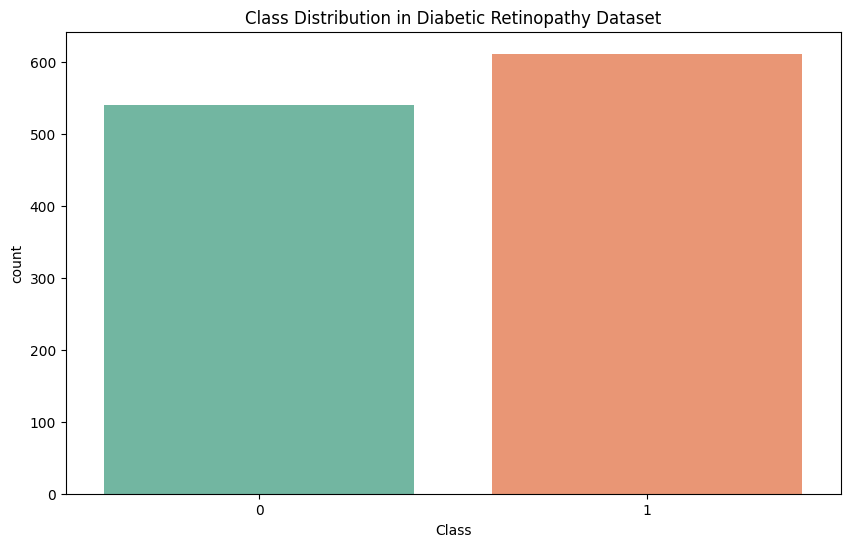

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data, palette='Set2')
plt.title("Class Distribution in Diabetic Retinopathy Dataset")
plt.show()
